In [6]:
import random
import numpy as np

In [7]:
class Network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) \
                        for x, y in zip(sizes[:-1], sizes[1:])]
    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a;

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
#         training_data = list(training_data)
        if test_data:
            n_test = sum(1 for _ in test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print('Epoch {0}: {1} / {2}'.format(
                    j, self.evaluate(test_data), n_test))
            else:
                 print('Epoch {0} complete'.format(j))
    
    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                       for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                      for b, nb in zip(self.biases, nabla_b)]
        
    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        activation = x
        activations = [x]
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
    
    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y)
                       for (x, y) in test_data]
        return sum(int(x==y) for (x, y) in test_results)
    
    def cost_derivative(self, output_activations, y):
        return (output_activations-y)

In [8]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

## Testing time!

In [9]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [10]:
net = Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 8217 / 10000
Epoch 1: 8289 / 10000
Epoch 2: 8417 / 10000
Epoch 3: 8421 / 10000
Epoch 4: 8462 / 10000
Epoch 5: 8470 / 10000
Epoch 6: 8489 / 10000
Epoch 7: 8584 / 10000
Epoch 8: 9433 / 10000
Epoch 9: 9433 / 10000
Epoch 10: 9421 / 10000
Epoch 11: 9463 / 10000
Epoch 12: 9465 / 10000
Epoch 13: 9441 / 10000
Epoch 14: 9457 / 10000
Epoch 15: 9496 / 10000
Epoch 16: 9452 / 10000
Epoch 17: 9470 / 10000
Epoch 18: 9496 / 10000
Epoch 19: 9505 / 10000
Epoch 20: 9510 / 10000
Epoch 21: 9483 / 10000
Epoch 22: 9508 / 10000
Epoch 23: 9480 / 10000
Epoch 24: 9509 / 10000
Epoch 25: 9493 / 10000
Epoch 26: 9510 / 10000
Epoch 27: 9485 / 10000
Epoch 28: 9502 / 10000
Epoch 29: 9488 / 10000


## Demo

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Image number 1075 is a 1, and the network predicted a 1


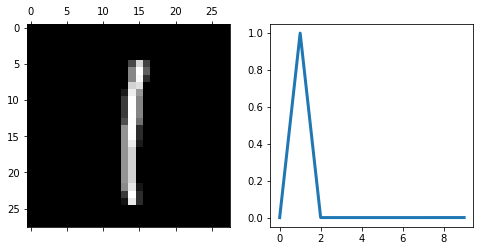

In [16]:
imgnr = np.random.randint(0,10000)
prediction = net.feedforward(test_data[imgnr][0])
print("Image number {0} is a {1}, and the network predicted a {2}".format(imgnr, test_data[imgnr][1], np.argmax(prediction)))
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].matshow(np.reshape(test_data[imgnr][0], (28,28) ), cmap='gray')
ax[1].plot(prediction, lw=3)
ax[1].set_aspect(9)
plt.show()